<a href="https://colab.research.google.com/github/dumindu00/K-means-clustering--application/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs

In [4]:
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

In [5]:
x = points[: , 0]
y = points[: , 1]

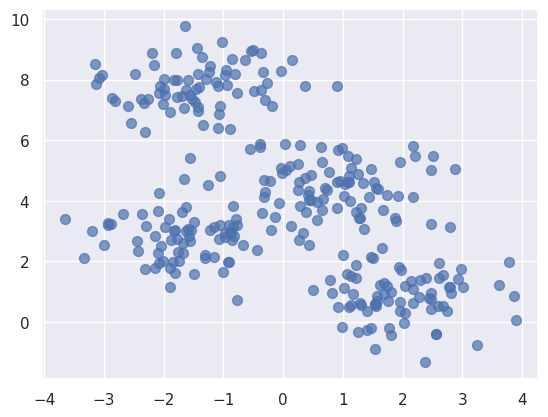

In [6]:
plt.scatter(x, y, s=50, alpha=0.7)

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

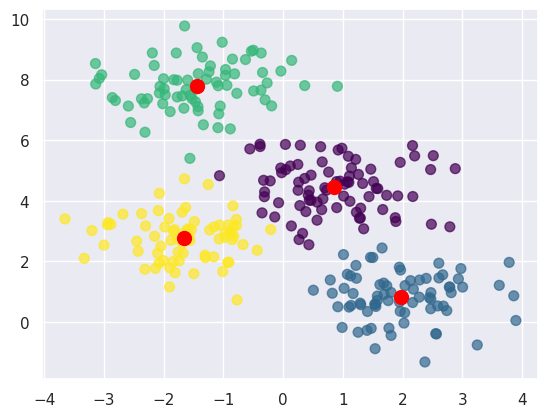

In [9]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [10]:
inertias = []

Text(0, 0.5, 'Inertia')

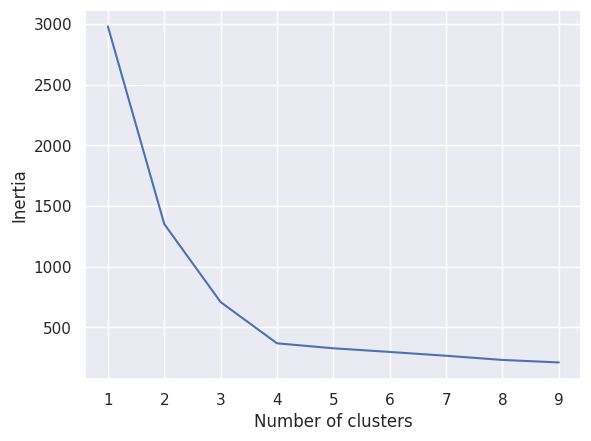

In [11]:
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')



Now try with real example


In [12]:
import pandas as pd

In [14]:
df = pd.read_csv('dataset.txt')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

lets' plot data

In [16]:
points = df.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]

Text(0, 0.5, 'Spending Score')

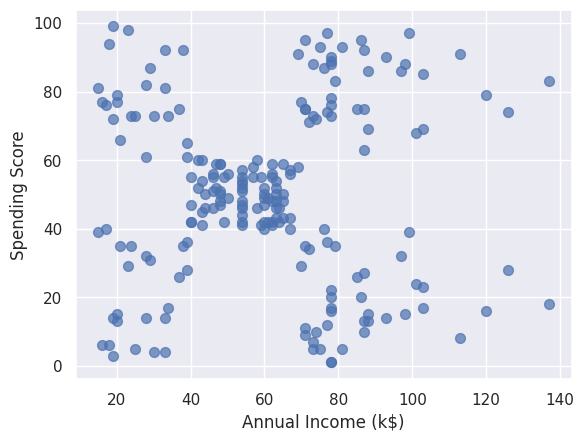

In [17]:
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

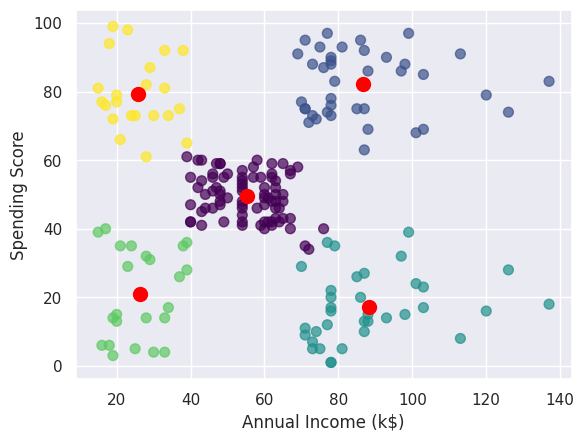

In [20]:
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

In [21]:
df2 = df.copy()
df2["Cluster"] = kmeans.predict(points)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [22]:
import numpy as np

In [23]:
cluster = kmeans.predict(np.array([[120, 20]]))[0]
clustered_df = df2[df2['Cluster'] == cluster]
clustered_df['CustomerID'].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

In [24]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df2 = df.copy()
encoder = LabelEncoder()
df2["Gender"] = encoder.fit_transform(df['Gender'])
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
points = df2.iloc[:, 1:5].values
inertias = []


for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

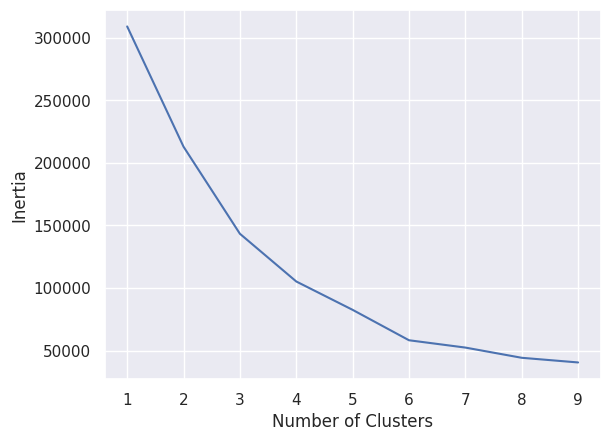

In [33]:
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [34]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
df2["Cluster"] = kmeans.predict(points)
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


In [39]:
results = pd.DataFrame(columns= ['Cluster', 'Average age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
  age = center[1]
  income = center[2]
  spend = center[3]

  gdf = df2[df2['Cluster'] == i]
  females = gdf[gdf['Gender'] == 0].shape[0]
  males = gdf[gdf['Gender'] == 1].shape[0]

  results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,54.060000,40.460000,36.720000,28.0,22.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,25.250000,25.833333,76.916667,14.0,10.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,33.396226,58.056604,48.773585,34.0,19.0
